# Business Decision Research

## Data Preparation

### Data Inspection

In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# upload dataset
df = pd.read_csv('data_retail.csv', sep=';')

#checking dataset 
print(df.head())
print('\nInfo dataset:')
print(df.info())

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 

### Data Cleansing

In [4]:
# make a column First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# make a column Last_Transaction
df['Last_Transaction']=pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin = '1970-01-01')

# Checking dataset after data cleansing
print(df.head())

print('\nInfo dataset:')
print(df.info())

   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data co

In [5]:
# delete column no and Row_Num
del df['no']
del df['Row_Num']

### Churn Customer

In [6]:
# make a column is_churn, for Last_Transaction <= 2018-08-01 is True and > 2018-08-01 is False
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = 1 
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = 0

# Checking dataset after make a column is_churn
print(df.head())

print('\nInfo dataset:')
print(df.info())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction  is_churn  
0                 22       0.0  
1                 41       0.0  
2                 30       0.0  
3                 27       0.0  
4                 25       0.0  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 

## Data Visualization

### Graph of Customer Acquisition

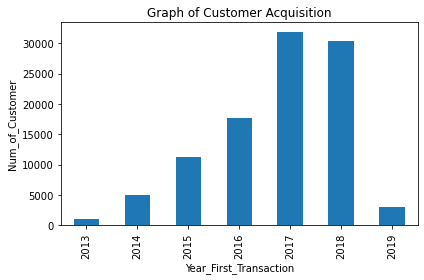

In [7]:
# column Year First Transaction
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# column Year Last Transaction
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

# Graph of Customer Acquisition
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Graph of Transaction Customer by Year

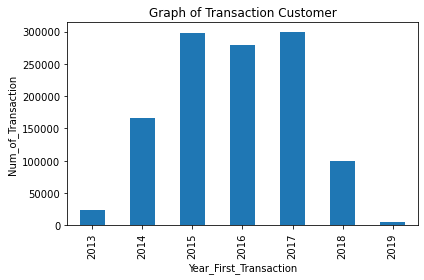

In [8]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Graph Average Transaction Amount by Year

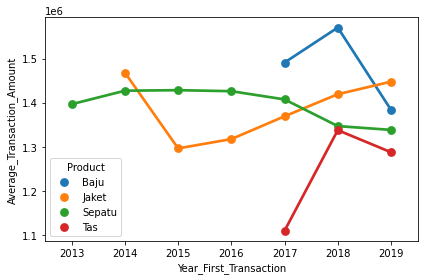

In [8]:
plt.clf()
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### Proportion Churn by Product

<Figure size 432x288 with 0 Axes>

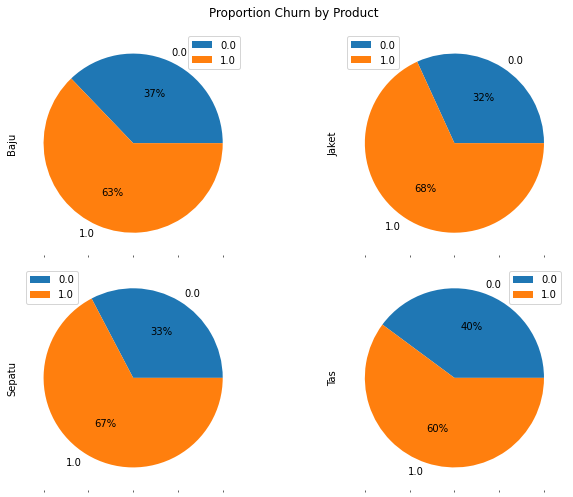

In [9]:
plt.clf()
# pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Get Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Customer Distribution by Count Transaction Group

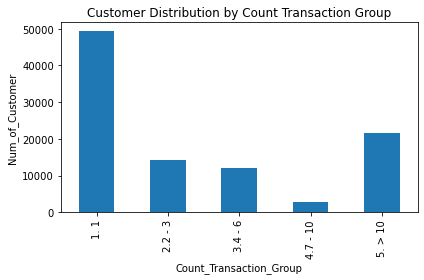

In [10]:
plt.clf()
# categorize transaction amount
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5. > 10'
    return val
# add a colum Count Transaction Group
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Distribution of Average Transaction Amount Category

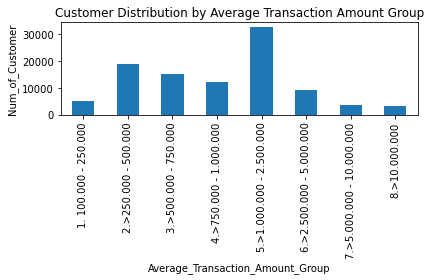

In [11]:
plt.clf()
# Category from Average Transaction Amount
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <=500000):
        val ='2.>250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <=750000):
        val ='3.>500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <=1000000):
        val ='4.>750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5.>1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6.>2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7.>5.000.000 - 10.000.000'
    else:
        val ='8.>10.000.000'
    return val
# Add column Average Transaction Amount Group from f function
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Modelling

In [12]:
# feature column Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# using column Average_Transaction_Amount, Count_Transaction and Year_Diff for feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train)
print(y_train)

       Average_Transaction_Amount  Count_Transaction  Year_Diff
2606                      1649125                 34          2
57228                     7432327                  1          0
8382                      1224173                 27          2
60281                     3775449                  2          0
48432                      149891                  1          0
...                           ...                ...        ...
21243                     1630986                  1          0
45891                      666589                  1          0
42613                     2876998                  1          0
43567                     1000026                  5          0
68268                     2318409                  1          0

[75000 rows x 3 columns]
2606     0.0
57228    0.0
8382     1.0
60281    1.0
48432    0.0
        ... 
21243    1.0
45891    1.0
42613    1.0
43567    1.0
68268    1.0
Name: is_churn, Length: 75000, dtype: float64


<Figure size 432x288 with 0 Axes>

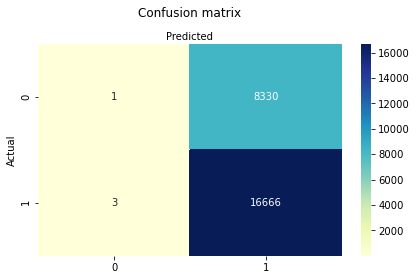

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# fit
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate Accuracy, Precision and Recall
print('Accuracy :',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test, y_pred, average='micro'))
print('Recall   :',recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
